In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


varible definitions at: https://www.kaggle.com/competitions/titanic/data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
category_cols = ['Pclass', 'Sex', 'SibSp', 'Parch',
                'Embarked', 'Cabin']

numeric_cols = ['Age', 'Fare']

target = 'Survived'

discard_cols = ['PassengerId', 'Ticket', 'Name']

assert len(category_cols) + len(numeric_cols) + len(discard_cols) + 1 == data.shape[1]

In [5]:
print(data.count() / len(data))

PassengerId    1.000000
Survived       1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.801347
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       0.997755
dtype: float64


In [6]:
# Cabin missing too much and is beyond repairing
if 'Cabin' in category_cols: category_cols.remove('Cabin')
discard_cols.append('Cabin')

data['Sex'].replace(to_replace='female', value=0, inplace=True)
data['Sex'].replace(to_replace='male',  value=1, inplace=True)

set(data['Embarked'])

{'C', 'Q', 'S', nan}

In [7]:
data['Embarked'].replace(to_replace='C', value=0, inplace=True)
data['Embarked'].replace(to_replace='Q',  value=1, inplace=True)
data['Embarked'].replace(to_replace='S',  value=2, inplace=True)

In [8]:
features = data.drop(columns=discard_cols + [target]).copy()
labels = data[target].copy()

In [9]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2.0
1,1,0,38.0,1,0,71.2833,0.0
2,3,0,26.0,0,0,7.9250,2.0
3,1,0,35.0,1,0,53.1000,2.0
4,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2.0
887,1,0,19.0,0,0,30.0000,2.0
888,3,0,NaN,1,2,23.4500,2.0
889,1,1,26.0,0,0,30.0000,0.0


## Missing values

In [10]:
print(features.count() / len(features))

Pclass      1.000000
Sex         1.000000
Age         0.801347
SibSp       1.000000
Parch       1.000000
Fare        1.000000
Embarked    0.997755
dtype: float64


Age can be filled in by some methods

kNN is not suitable for continuous variables since K is unknown, we use 序贯热平台插补

Notice that in numpy all missing values are `np.nan`, that said, other variables might have semantically missing values, like ' ' or something else, all good here by checking the original data

In [11]:
# we can bin the Age, change it from continuous to discrete
features['Age'] = pd.cut(np.array(features['Age']), bins=5).codes
dummy_features = features.copy()
dummy_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,7.2500,2.0
1,1,0,2,1,0,71.2833,0.0
2,3,0,1,0,0,7.9250,2.0
3,1,0,2,1,0,53.1000,2.0
4,3,1,2,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1,1,0,0,13.0000,2.0
887,1,0,1,0,0,30.0000,2.0
888,3,0,-1,1,2,23.4500,2.0
889,1,1,1,0,0,30.0000,0.0


In [12]:
print(dummy_features.corr())
print(np.sort(dummy_features.corr()['Age']))

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000  0.131900 -0.347430  0.083081  0.018443 -0.549500  0.164681
Sex       0.131900  1.000000  0.010495 -0.114631 -0.245489 -0.182333  0.110320
Age      -0.347430  0.010495  1.000000 -0.155993 -0.008735  0.146276  0.094913
SibSp     0.083081 -0.114631 -0.155993  1.000000  0.414838  0.159651  0.068900
Parch     0.018443 -0.245489 -0.008735  0.414838  1.000000  0.216225  0.040449
Fare     -0.549500 -0.182333  0.146276  0.159651  0.216225  1.000000 -0.226311
Embarked  0.164681  0.110320  0.094913  0.068900  0.040449 -0.226311  1.000000
[-0.34743004 -0.15599309 -0.00873482  0.01049486  0.09491348  0.14627624
  1.        ]


Take the `absolute value` of correlation coefficient, Pclass is has the largest correlation with Age, 

plus, Pclass is full, so we take Pclass for 序贯热平台插补

> 假设我们要填特征B，特征A与B的相关性最高，我们将A按照降序进行排列，这种顺序应用到B上，然后B取特征内的上方样本的值填补缺失

In [13]:
dummy_features.sort_values('Pclass', ascending=False, inplace=True) # the order of features changes after this

for i in range(dummy_features.shape[0]):
    if i == 0 and dummy_features['Age'][i] == -1:   # if the first row is missing, take the nearest lower valid value
        for j in range(i, dummy_features.shape[0]):
            if dummy_features['Age'][j] != -1:
                dummy_features['Age'][i] = dummy_features['Age'][j]
                break
    if dummy_features['Age'][i] == -1:      # otherwise take the nearest upper valid value
        for j in range(i, -1, -1):
            if dummy_features['Age'][j] != -1:
                dummy_features['Age'][i] = dummy_features['Age'][j]
                break
dummy_features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24480\890501509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_features['Age'][i] = dummy_features['Age'][j]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,7.2500,2.0
511,3,1,1,0,0,8.0500,2.0
500,3,1,1,0,0,8.6625,2.0
501,3,0,1,0,0,7.7500,1.0
502,3,0,1,0,0,7.6292,1.0
...,...,...,...,...,...,...,...
102,1,1,1,0,1,77.2875,2.0
710,1,0,1,0,0,49.5042,0.0
711,1,1,1,0,0,26.5500,2.0
712,1,1,2,1,0,52.0000,2.0


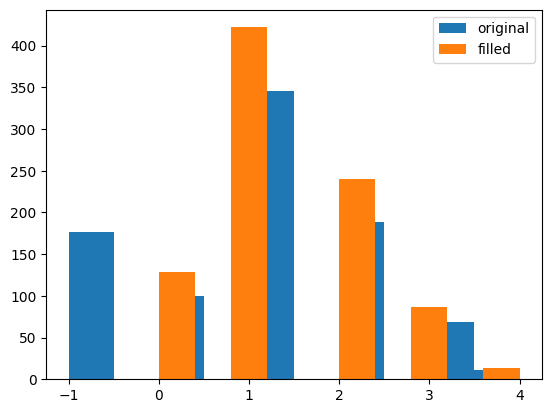

In [14]:
from matplotlib import pyplot as plt

plt.hist(features['Age'], label="original")
plt.hist(dummy_features['Age'], label="filled")
plt.legend()

And that's for *Age*, now for *Embarked*, there are 2 missing values, just drop these 2 rows

In [15]:
dummy_features = dummy_features.dropna()
dummy_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 445
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    int8   
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 49.5 KB


# Squared Variance Filtering

In [32]:
features = dummy_features

print(np.std(features))     # sex should have the least variance, no features dropped here

Pclass       0.834230
Sex          0.477269
Age          0.895617
SibSp        1.103084
Parch        0.806307
Fare        49.669545
Embarked     0.791642
dtype: float64


## Feature Generation

In [34]:
colNames = list(features.columns)    
colNames.remove("Fare")     # Fare is continuous, remove it

colNames_new_l = []
features_new_l = []

for col_index, col_name in enumerate(colNames):
    print(col_index, col_name)

for col_index, col_name in enumerate(colNames):
    for col_sub_index in range(col_index+1, len(colNames)):
        newNames = col_name + '&' + colNames[col_sub_index]
        print(newNames)

for col_index, col_name in enumerate(colNames):
    for col_sub_index in range(col_index+1, len(colNames)):
        newNames = col_name + '&' + colNames[col_sub_index]
        colNames_new_l.append(newNames)
        newDF = pd.Series(features[col_name].astype('str') 
                          + '&'
                          + features[colNames[col_sub_index]].astype('str'), 
                          name=col_name)
        features_new_l.append(newDF)
features_new = pd.concat(features_new_l, axis=1)
features_new.columns = colNames_new_l
features_new

0 Pclass
1 Sex
2 Age
3 SibSp
4 Parch
5 Embarked
Pclass&Sex
Pclass&Age
Pclass&SibSp
Pclass&Parch
Pclass&Embarked
Sex&Age
Sex&SibSp
Sex&Parch
Sex&Embarked
Age&SibSp
Age&Parch
Age&Embarked
SibSp&Parch
SibSp&Embarked
Parch&Embarked


,Pclass&Sex,Pclass&Age,Pclass&SibSp,Pclass&Parch,Pclass&Embarked,Sex&Age,Sex&SibSp,Sex&Parch,Sex&Embarked,Age&SibSp,Age&Parch,Age&Embarked,SibSp&Parch,SibSp&Embarked,Parch&Embarked
0,3&1,3&1,3&1,3&0,3&2.0,1&1,1&1,1&0,1&2.0,1&1,1&0,1&2.0,1&0,1&2.0,0&2.0
511,3&1,3&1,3&0,3&0,3&2.0,1&1,1&0,1&0,1&2.0,1&0,1&0,1&2.0,0&0,0&2.0,0&2.0
500,3&1,3&1,3&0,3&0,3&2.0,1&1,1&0,1&0,1&2.0,1&0,1&0,1&2.0,0&0,0&2.0,0&2.0
501,3&0,3&1,3&0,3&0,3&1.0,0&1,0&0,0&0,0&1.0,1&0,1&0,1&1.0,0&0,0&1.0,0&1.0
502,3&0,3&1,3&0,3&0,3&1.0,0&1,0&0,0&0,0&1.0,1&0,1&0,1&1.0,0&0,0&1.0,0&1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1&1,1&1,1&0,1&1,1&2.0,1&1,1&0,1&1,1&2.0,1&0,1&1,1&2.0,0&1,0&2.0,1&2.0
710,1&0,1&1,1&0,1&0,1&0.0,0&1,0&0,0&0,0&0.0,1&0,1&0,1&0.0,0&0,0&0.0,0&0.0
711,1&1,1&1,1&0,1&0,1&2.0,1&1,1&0,1&0,1&2.0,1&0,1&0,1&2.0,0&0,0&2.0,0&2.0
712,1&1,1&2,1&1,1&0,1&2.0,1&2,1&1,1&0,1&2.0,2&1,2&0,2&2.0,1&0,1&2.0,0&2.0


In [35]:
colNames_new_l

['Pclass&Sex',
 'Pclass&Age',
 'Pclass&SibSp',
 'Pclass&Parch',
 'Pclass&Embarked',
 'Sex&Age',
 'Sex&SibSp',
 'Sex&Parch',
 'Sex&Embarked',
 'Age&SibSp',
 'Age&Parch',
 'Age&Embarked',
 'SibSp&Parch',
 'SibSp&Embarked',
 'Parch&Embarked']

In [36]:
def cate_colName(Transformer, category_cols, drop='if_binary'):
    """
    离散字段独热编码后字段名创建函数
    
    :param Transformer: 独热编码转化器
    :param category_cols: 输入转化器的离散变量
    :param drop: 独热编码转化器的drop参数
    """
    
    cate_cols_new = []
    col_value = Transformer.categories_
    
    for i, j in enumerate(category_cols):
        if (drop == 'if_binary') & (len(col_value[i]) == 2):
            cate_cols_new.append(j)
        else:
            for f in col_value[i]:
                feature_name = j + '_' + f
                cate_cols_new.append(feature_name)
    return(cate_cols_new)

In [37]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit_transform(features_new)

cate_colName(enc, colNames_new_l, drop=None)
features_new_af = pd.DataFrame(enc.fit_transform(features_new).toarray(), 
                               columns = cate_colName(enc, colNames_new_l, drop=None))
features_new_af

,Pclass&Sex_1&0,Pclass&Sex_1&1,Pclass&Sex_2&0,Pclass&Sex_2&1,Pclass&Sex_3&0,Pclass&Sex_3&1,Pclass&Age_1&0,Pclass&Age_1&1,Pclass&Age_1&2,Pclass&Age_1&3,...,Parch&Embarked_1&2.0,Parch&Embarked_2&0.0,Parch&Embarked_2&1.0,Parch&Embarked_2&2.0,Parch&Embarked_3&0.0,Parch&Embarked_3&2.0,Parch&Embarked_4&2.0,Parch&Embarked_5&1.0,Parch&Embarked_5&2.0,Parch&Embarked_6&2.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
885,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This can be encapsulated as a function: `Binary_Cross_Combination()`

In [42]:
feature_temp = pd.concat([features, features_new_af])

### Filtering

- squared variance test

In [41]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit(feature_temp)

CrossComb_cols = feature_temp.columns[sel.variances_ > 0.01 * 0.99]
CrossComb_cols

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Pclass&Sex_1&0', 'Pclass&Sex_1&1', 'Pclass&Sex_2&0',
       ...
       'SibSp&Embarked_2&2.0', 'SibSp&Embarked_3&2.0', 'SibSp&Embarked_4&2.0',
       'Parch&Embarked_0&0.0', 'Parch&Embarked_0&1.0', 'Parch&Embarked_0&2.0',
       'Parch&Embarked_1&0.0', 'Parch&Embarked_1&2.0', 'Parch&Embarked_2&0.0',
       'Parch&Embarked_2&2.0'],
      dtype='object', length=138)

In [ ]:
from sklearn.feature_selection import chi2

chi2(feature_temp[CrossComb_cols], y_train)